In [2]:
#import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 2 dimensional

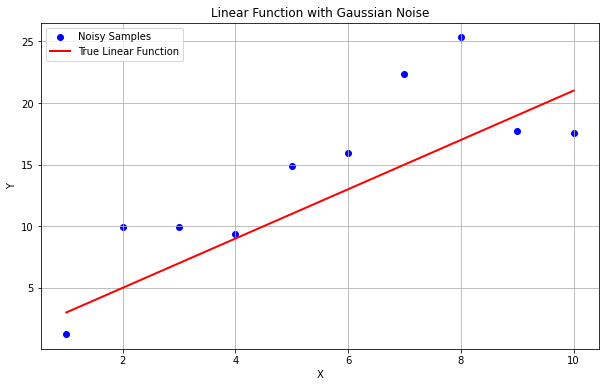

In [3]:
np.random.seed(32)

x = np.linspace(1, 10, 10)  # 10 equally spaced points between 0 and 10

# Define a linear function: y = mx + b
m = 2  # slope
b = 1  # y-intercept
y_true = m * x + b

# Add Gaussian noise
noise = np.random.normal(0, 5, size=y_true.shape)  # mean=0, std=5
y_noisy = y_true + noise

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(x, y_noisy, color='blue', label='Noisy Samples', marker='o')
plt.plot(x, y_true, color='red', label='True Linear Function', linewidth=2)
plt.title('Linear Function with Gaussian Noise')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid()
plt.show()


In [4]:
x = x.reshape(x.shape[0],1)

In [5]:
x = np.concatenate((x,np.ones((x.shape[0],1))),axis=1)

In [6]:
R = x.T@x
R

array([[385.,  55.],
       [ 55.,  10.]])

In [7]:
P = x.T@y_noisy
P

array([951.96227031, 144.15312639])

In [8]:
np.linalg.pinv(R)@P

array([1.92872818, 3.80730763])

## 3 dimensional 

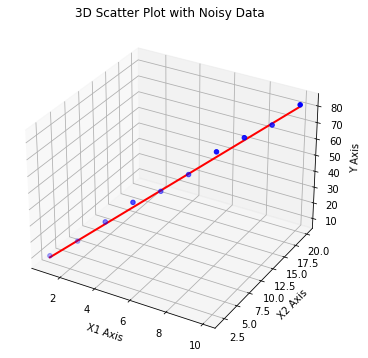

In [131]:
# Set a random seed for reproducibility
np.random.seed(42)

# Generate 10 sample points for 2D x
x1 = np.linspace(1, 10, 10)  # First dimension
x2 = np.linspace(2, 20, 10)   # Second dimension
X = np.column_stack((x1, x2))  # Combine into a 2D array


# Define a linear function: y = m1*x1 + m2*x2 + b
m1 = 2  # slope for x1
m2 = 3  # slope for x2
b = 1   # y-intercept

# Calculate true y values without noise
y_true = m1 * X[:, 0] + m2 * X[:, 1] + b


# Add Gaussian noise to each value of y
noise = np.random.normal(0, 2, size=y_true.shape)  # mean=0, std=2
y_noisy = y_true + noise

# Plotting the results
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0],X[:, 1], y_noisy, color='blue', label='Noisy Samples', marker='o')
ax.plot(X[:, 0],X[:, 1], y_true, color='red', label='True Linear Function', linewidth=2)


ax.set_xlabel('X1 Axis')
ax.set_ylabel('X2 Axis')
ax.set_zlabel('Y Axis')
ax.set_title('3D Scatter Plot with Noisy Data')
plt.show()


In [132]:
y_noisy = y_noisy.reshape((y_noisy.shape[0],1))

In [133]:
X = np.concatenate((X,np.ones((X.shape[0],1))),axis=1)

In [134]:
R = X.T@X
R

array([[ 385.,  770.,   55.],
       [ 770., 1540.,  110.],
       [  55.,  110.,   10.]])

In [135]:
P = X.T@y_noisy
P

array([[3183.14816096],
       [6366.29632192],
       [ 458.96122223]])

In [136]:
np.linalg.pinv(R)@P

array([[1.59723985],
       [3.1944797 ],
       [1.97202631]])

In [137]:
def fit(X,y_noisy):
  try:
    X.shape[1]
  except:
    X = X.reshape(X.shape[0],1)
  y_noisy = y_noisy.reshape((y_noisy.shape[0],1))
  X = np.concatenate((X,np.ones((X.shape[0],1))),axis=1)
  R = X.T@X
  P = X.T@y_noisy
  return np.linalg.pinv(R)@P
  # print(P)

fit(X,y_noisy)

array([[1.59723985],
       [3.1944797 ],
       [0.98601316],
       [0.98601316]])

In [93]:
x1 = np.linspace(1, 10, 10)  # First dimension
x2 = np.linspace(2, 20, 10)  # Second dimension
x3 = np.linspace(3, 30, 10)  # Third dimension
X = np.column_stack((x1, x2, x3))

# Define a linear function: y = m1*x1 + m2*x2 + b
m1 = 2  # slope for x1
m2 = 3  # slope for x2
m3 = 4  # slope for x2
b = 1  # y-intercept

# Calculate true y values without noise
y_true = m1 * X[:, 0] + m2 * X[:, 1] + m3 * X[:, 2] + b

# Add Gaussian noise to each value of y
noise = np.random.normal(0, 2, size=y_true.shape)  # mean=0, std=2
y_noisy = y_true + noise

In [94]:
fit(X,y_noisy)

array([[ 1.4221553 ],
       [ 2.8443106 ],
       [ 4.26646589],
       [-0.08727438]])